In [1]:
#SMOTE - Synthetic Minority Over Sampling Techniques

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("ecosystem_data.csv")
data

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph,ecosystem_health
0,37.454012,112.092246,0.729998,63.814457,5.144016,degraded
1,95.071431,99.873629,0.184512,45.929245,4.021498,degraded
2,73.199394,52.846174,0.346640,96.449852,4.194976,degraded
3,59.865848,182.180001,0.663281,21.897845,4.493691,degraded
4,15.601864,142.987248,0.482089,58.785642,4.620093,degraded
...,...,...,...,...,...,...
9995,85.765599,263.111589,0.952275,75.403391,6.923449,degraded
9996,89.750884,14.044187,0.747824,76.452694,4.744065,at risk
9997,94.670792,91.109541,0.019456,26.956943,7.619473,degraded
9998,39.748799,132.996002,0.401005,43.431977,6.365560,degraded


In [4]:
data.describe()

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49.415956,151.358963,0.500050,49.871338,6.232751
std,28.763013,86.788365,0.286774,28.899459,1.591063
min,0.001163,0.047323,0.000048,0.000554,3.500092
25%,24.632887,76.183740,0.253748,24.685725,4.843497
50%,49.252862,151.769033,0.502068,50.003024,6.215445
75%,74.000635,226.943766,0.744674,74.711625,7.627624
max,99.971767,299.977448,0.999901,99.978937,8.999847


In [5]:
data.isna().sum()

water_quality         0
air_quality_index     0
biodiversity_index    0
vegetation_cover      0
soil_ph               0
ecosystem_health      0
dtype: int64

In [6]:
data.head()

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph,ecosystem_health
0,37.454012,112.092246,0.729998,63.814457,5.144016,degraded
1,95.071431,99.873629,0.184512,45.929245,4.021498,degraded
2,73.199394,52.846174,0.346640,96.449852,4.194976,degraded
3,59.865848,182.180001,0.663281,21.897845,4.493691,degraded
4,15.601864,142.987248,0.482089,58.785642,4.620093,degraded


In [7]:
data.value_counts()

water_quality  air_quality_index  biodiversity_index  vegetation_cover  soil_ph   ecosystem_health
99.774939      89.355003          0.654514            39.735754         8.131975  at risk             1
99.767226      65.824692          0.074329            3.787101          6.366260  degraded            1
99.762830      264.843540         0.797314            97.154019         7.517320  degraded            1
99.742294      251.519727         0.960874            51.450392         7.962349  degraded            1
99.723790      49.265087          0.732294            69.969866         6.435393  healthy             1
                                                                                                     ..
0.022704       255.753191         0.041177            69.061121         3.918978  degraded            1
0.013469       246.202615         0.581405            86.414168         4.098989  degraded            1
0.005283       172.123273         0.668465            92.788710      

In [8]:
data['ecosystem_health'].unique()

array(['degraded', 'at risk', 'healthy'], dtype=object)

In [9]:
data['ecosystem_health'] = data['ecosystem_health'].map({'healthy' : 0, 'at risk' : 1, 'degraded' : 2})

In [10]:
X = data[['water_quality', 'air_quality_index', 'biodiversity_index', 'vegetation_cover', 'soil_ph']]
y = data['ecosystem_health']

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X, y = smote.fit_resample(X, y)
y.value_counts()

ecosystem_health
2    8761
0    8761
1    1120
Name: count, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
model = GaussianNB()


In [14]:
model.fit(X_train, y_train)

GaussianNB()

In [15]:
y_pred = model.predict(X_test)

In [16]:
y_pred

array([2, 2, 2, ..., 2, 2, 0], shape=(3729,))

In [17]:
accuracy = accuracy_score(y_pred, y_test)

In [18]:
accuracy

0.9705014749262537

In [19]:
class_report = classification_report(y_test, y_pred)
class_report

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99      1710\n           1       1.00      0.52      0.69       230\n           2       0.96      1.00      0.98      1789\n\n    accuracy                           0.97      3729\n   macro avg       0.98      0.84      0.89      3729\nweighted avg       0.97      0.97      0.97      3729\n'

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)

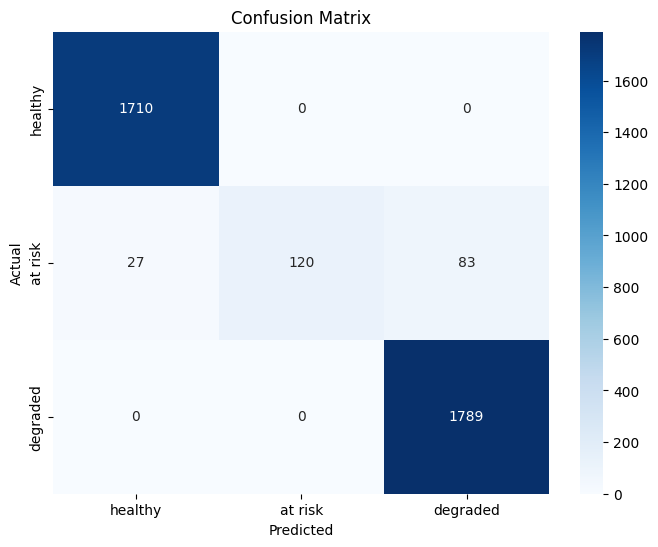

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['healthy', 'at risk', 'degraded'], yticklabels=['healthy', 'at risk', 'degraded'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
import joblib

In [23]:
joblib.dump(model, 'Ecosystem_Data_SMOTE.pkl')

['Ecosystem_Data_SMOTE.pkl']

In [24]:
eco = joblib.load('Ecosystem_Data_SMOTE.pkl')

In [26]:
wq = float(input('Water Quality: '))
aqi = float(input('AQI: '))
bdi = float(input('BDI: '))
vc = float(input('Vegetation Cover: '))
sph = float(input('Soil pH: '))
new_data = np.array([[wq, aqi, bdi, vc, sph]])
prediction = eco.predict(new_data)
eco_map = {0: 'healthy', 1: 'at risk', 2: 'degraded'}
label = eco_map[prediction[0]]
print(f"The Eco System Health for water quality {label}")

Water Quality:  89.78
AQI:  15.12
BDI:  0.73
Vegetation Cover:  77.3
Soil pH:  4.7


The Eco System Health for water quality at risk


C:\Users\RENUKA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
